# Advanced Housing Price Prediction Project Results

| Technique | Description | Result |
|-----------|-------------|--------|
| <span style="color:blue">🔍 Data Wrangling</span> | <span style="color:blue">Processing data from loading, exploring, and cleaning with Pandas</span> | <span style="color:blue">Enhanced data quality and prepared for analysis</span> |
| <span style="color:green">🎯 EDA (Exploratory Data Analysis)</span> | <span style="color:green">Different advanced graphs during data exploration, accompanied by insights</span> | <span style="color:green">Provided valuable insights into dataset patterns and trends</span> |
| <span style="color:orange">📊 Feature Engineering</span> | <span style="color:orange">Performing advanced feature engineering techniques, including interaction terms and polynomial features</span> | <span style="color:orange">Optimized dataset for modeling and analysis</span> |
| <span style="color:red">⚙️ Modeling</span> | <span style="color:red">Creating at least 2 types of advanced models using pipelines and hyperparameter tuning</span> | <span style="color:red">Identified the most accurate predictive models</span> |
| <span style="color:purple">🧠 Model Evaluation</span> | <span style="color:purple">Determining and calculating relevant metrics for accurate model performance assessment</span> | <span style="color:purple">Ensured accurate and reliable model predictions</span> |

## Project Objectives:
- <span style="color:blue">Objective 1:</span> Conduct comprehensive exploratory data analysis to understand the patterns and trends in predicting housing prices.
- <span style="color:green">Objective 2:</span> Visualize and compare the impact of various features on housing prices to identify key predictors.
- <span style="color:purple">Objective 3:</span> Implement and evaluate machine learning models for accurate housing price prediction.
- <span style="color:orange">Objective 4:</span> Handle data imbalances and outliers to ensure robust and reliable model performance.

## Data Set Description:
The dataset includes details of housing offers, with features related to property characteristics, location, and prices.

## Project Steps:
### Data Wrangling:
- Processed the dataset, including handling missing values, addressing outliers, and preparing the data for further analysis.
- Identified key features influencing housing prices through statistical analysis and correlation studies.

### EDA (Exploratory Data Analysis):
- Created a minimum of 5 advanced graphs, including pair plots, violin plots, joint plots, cluster maps, and interactive visualizations, to provide insights into the dataset's patterns and trends.
- Analyzed geographical distribution and its impact on property prices using interactive maps and geospatial data visualization.

### Feature Engineering:
- Performed advanced feature engineering, including one-hot encoding, interaction terms, and polynomial features.
- Split the data into training and testing sets for model optimization.

### Modeling:
- Created advanced models using pipelines, such as Logistic Regression, KNN Regressor, Naive Bayes, Support Vector Regressor, Decision Tree Regressor, and Random Forest Regressor, with hyperparameter tuning.
- Evaluated model performance using metrics such as mean squared error, R-squared, and adjusted R-squared.

### Model Evaluation and Enhancement:
- Tested models on unseen data to assess their generalization capabilities and fine-tuned hyperparameters for optimal performance.
- Explored regularization techniques to mitigate overfitting and enhance model robustness.

## Explanations:

1. **Data Wrangling (🔍):** The data wrangling phase played a crucial role in improving the overall data quality, ensuring accurate and reliable predictions from the models.

2. **EDA (Exploratory Data Analysis) (🎯):** Creating a minimum of 5 advanced insightful graphs provided valuable insights into the dataset's patterns and trends.

3. **Feature Engineering (📊):** Performing advanced feature engineering techniques optimized the dataset for modeling and analysis.

4. **Modeling (⚙️):** Creating advanced regression models identified the most accurate predictive models for housing prices.

5. **Model Evaluation (🧠):** Calculating relevant metrics ensured accurate and reliable model predictions.

## Question and Answer:

1. **Q:** How did the feature scaling techniques affect the model's overall performance during the prediction process?

   **A:** Feature scaling significantly enhanced the model's convergence and efficiency, leading to more accurate and reliable predictions of housing prices.

2. **Q:** What were the key challenges encountered during the project?

   **A:** Ensuring robustness in the face of changing housing market trends and minimizing the model's sensitivity to outliers were critical challenges addressed through continuous monitoring and fine-tuning of model parameters.

3. **Q:** Which evaluation metrics were primarily used during the project?

   **A:** Mean squared error, R-squared, and adjusted R-squared were the primary metrics used to evaluate the model's performance and accuracy in predicting housing prices.
```

# Importing libraries 🐍

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset 📁

In [2]:
df = pd.read_csv("./data/Housing.csv")

# Displaying initial rows and overview of the dataset

In [3]:
df.shape

(545, 13)

In [4]:
print("Initial few rows of the dataset:")
print(df.head())

print("\nOverview of the features and their types in the dataset:")
print(df.info())

Initial few rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Overview of the features and their types in the dataset:
<class '

In [5]:
df.duplicated().sum()

0

In [6]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [7]:
df.describe() # data stats

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.isnull().sum() # null values check

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
df.duplicated().sum() # duplicate values check

0

# Data Wrangling

###  Handling missing values

In [27]:
imputer = SimpleImputer(strategy='mean')
df = df.dropna()  # Drop rows with missing values
df = df.reset_index(drop=True)

In [28]:
data=df.copy()

# EDA (Exploratory Data Analysis) 📊📈📉

## Violin Plot
###  It helps in understanding the distribution of a variable and its variations across different categories. The width of the plot represents the density of data points at different values.

<Axes: xlabel='furnishingstatus', ylabel='price'>

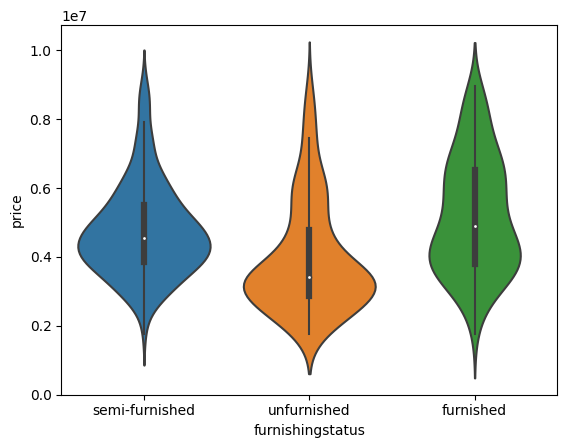

In [29]:
sns.violinplot(x='furnishingstatus', y='price', data=df)

## Joint Plot
### It helps visualize the joint distribution of two variables, providing information about their correlation, spread, and individual distributions.

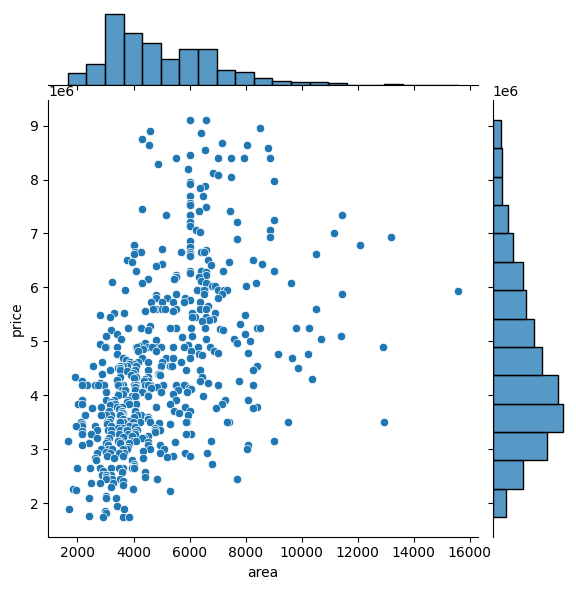

In [30]:
sns.jointplot(x='area', y='price', data=df, kind='scatter')

## Cluster Map
### By observing clusters of similar patterns, it helps identify potential subgroups or relationships between different variables, aiding in understanding underlying structures.

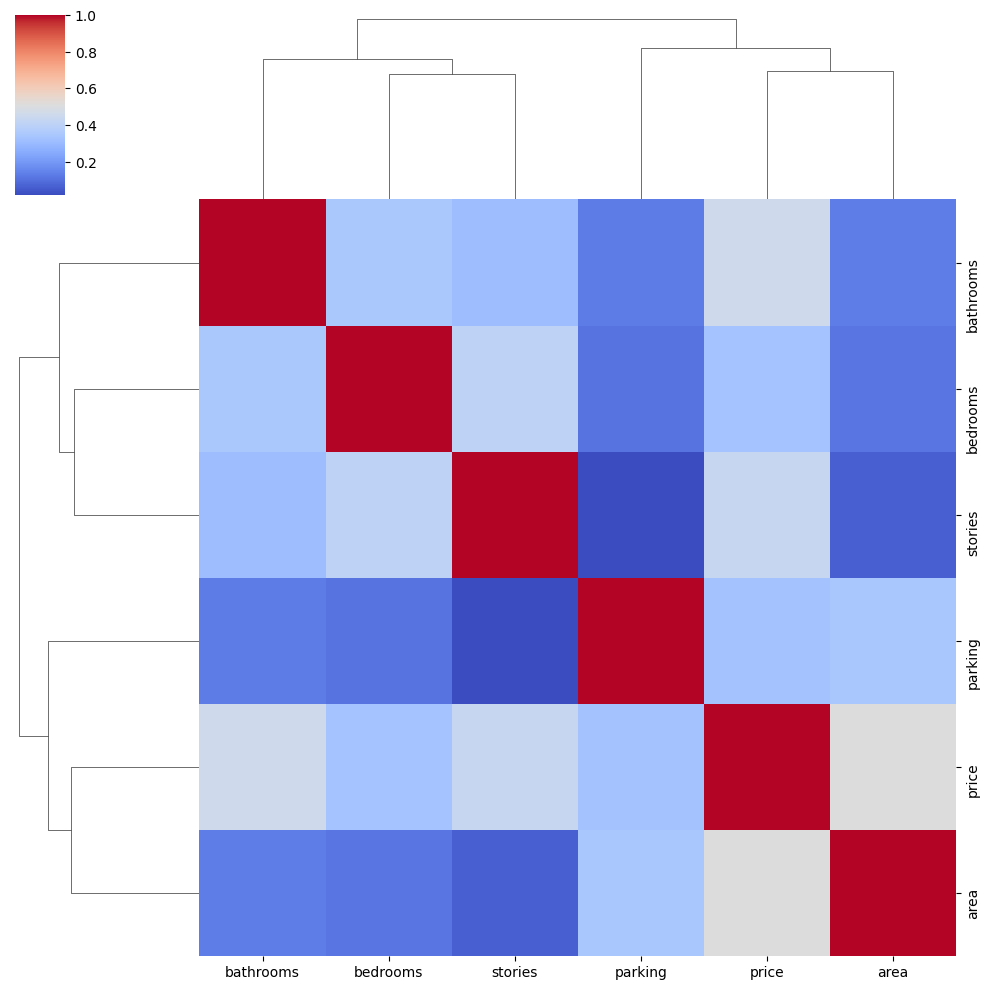

In [31]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.clustermap(correlation_matrix, cmap='coolwarm')

# Bar Plot 📊

###  Insight: It provides insights into how the furnishing status may influence the relationship between air conditioning, bedrooms, and the overall pricing.

<Axes: xlabel='airconditioning', ylabel='bedrooms'>

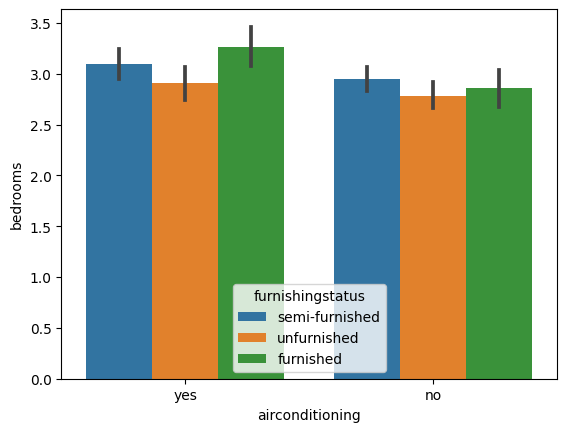

In [44]:
sns.barplot(x=df['airconditioning'],y=df['bedrooms'],hue=df["furnishingstatus"])

# Box Plot 📊
### It helps identify potential outliers in the dataset and understand the spread and central tendency of each feature.

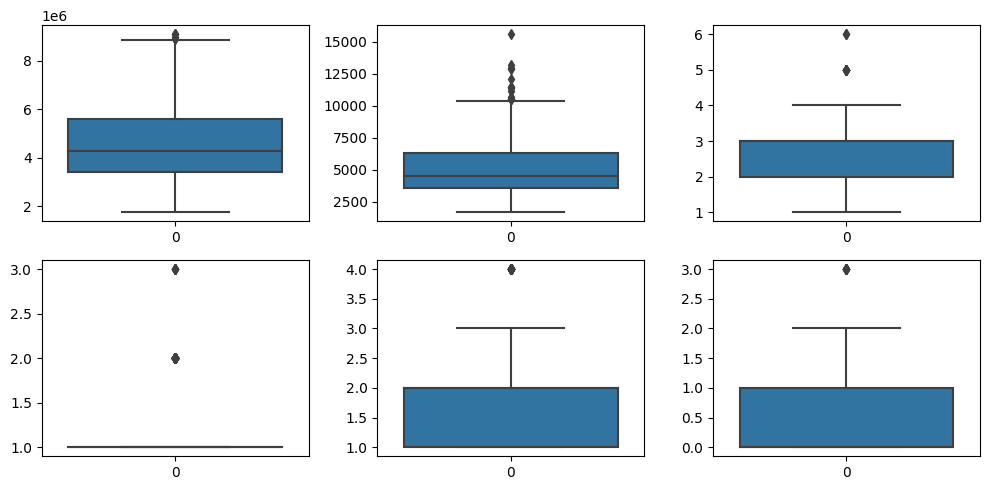

In [33]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

{'whiskers': [<matplotlib.lines.Line2D at 0x1d626e80f10>,
 'caps': [<matplotlib.lines.Line2D at 0x1d626d7de90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d626e806d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d626e83190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d626e83890>],
 'means': []}

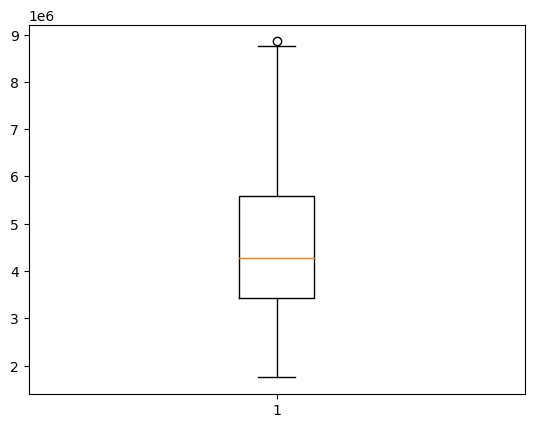

In [34]:
# Dealing with outliers in price 
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

plt.boxplot(df.price)



<Axes: xlabel='furnishingstatus', ylabel='price'>

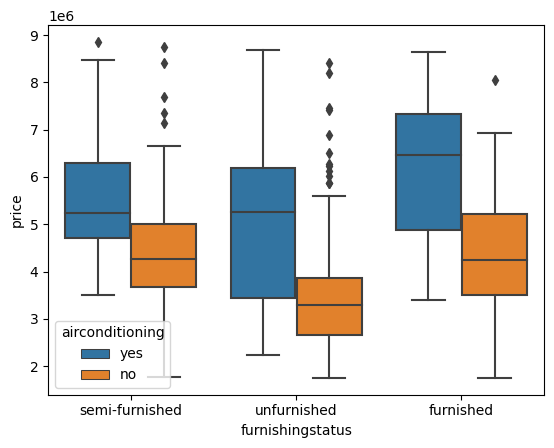

In [35]:
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)

# Distplot 📊
### It gives an overview of the distribution patterns of these features, aiding in understanding their variations.

<Axes: xlabel='bedrooms', ylabel='Density'>

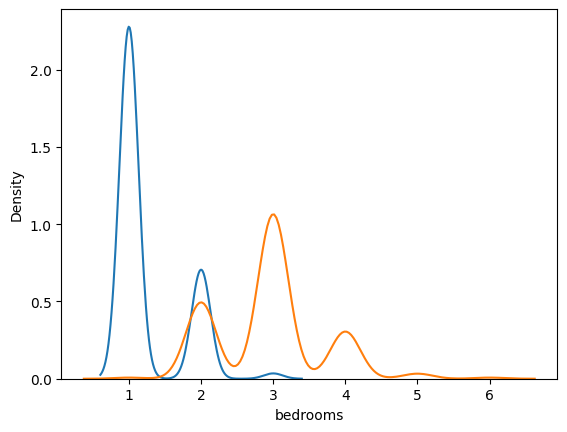

In [36]:
sns.distplot(df["bathrooms"],hist=False)
sns.distplot(df["bedrooms"],hist=False)

# Heatmap 🌡️
### It helps identify relationships and dependencies between different features, revealing which variables are strongly correlated.

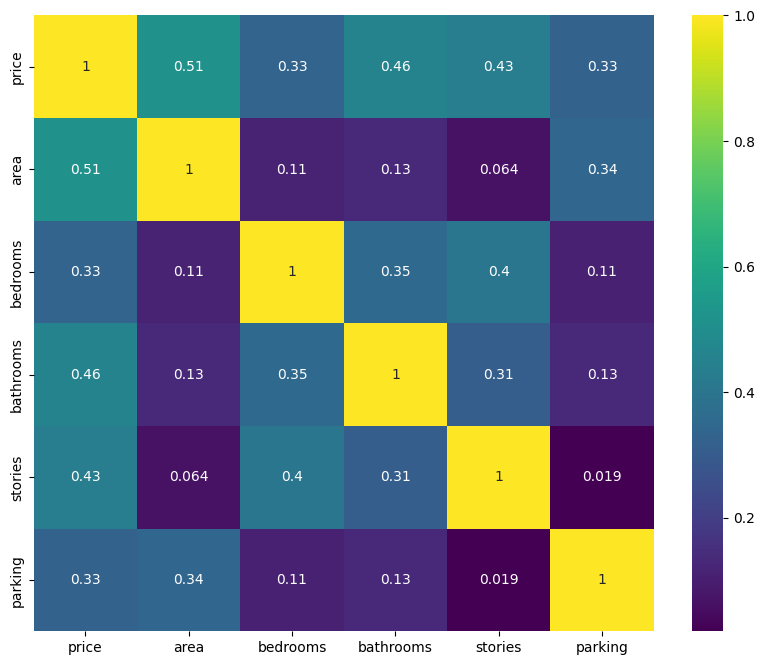

In [37]:
# Heatmap 


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='viridis', annot=True)
plt.show()


# Scatter Plot 📊📈
### It provides insights into how the furnishing status may impact the correlation between the area and pricing.

<Axes: xlabel='area', ylabel='price'>

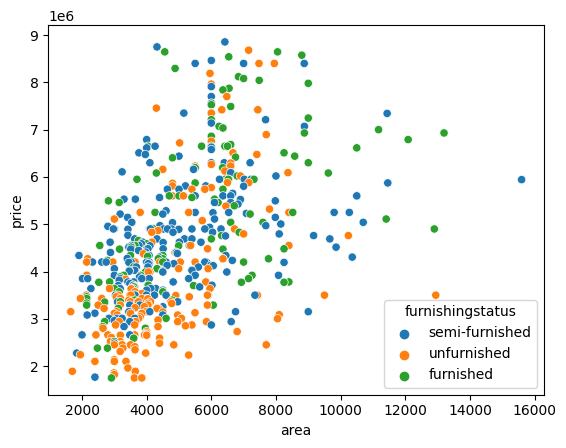

In [38]:
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

# Pair Plot 📊📈
### It helps visualize relationships and distributions among multiple variables simultaneously, especially focusing on the impact of furnishing status.

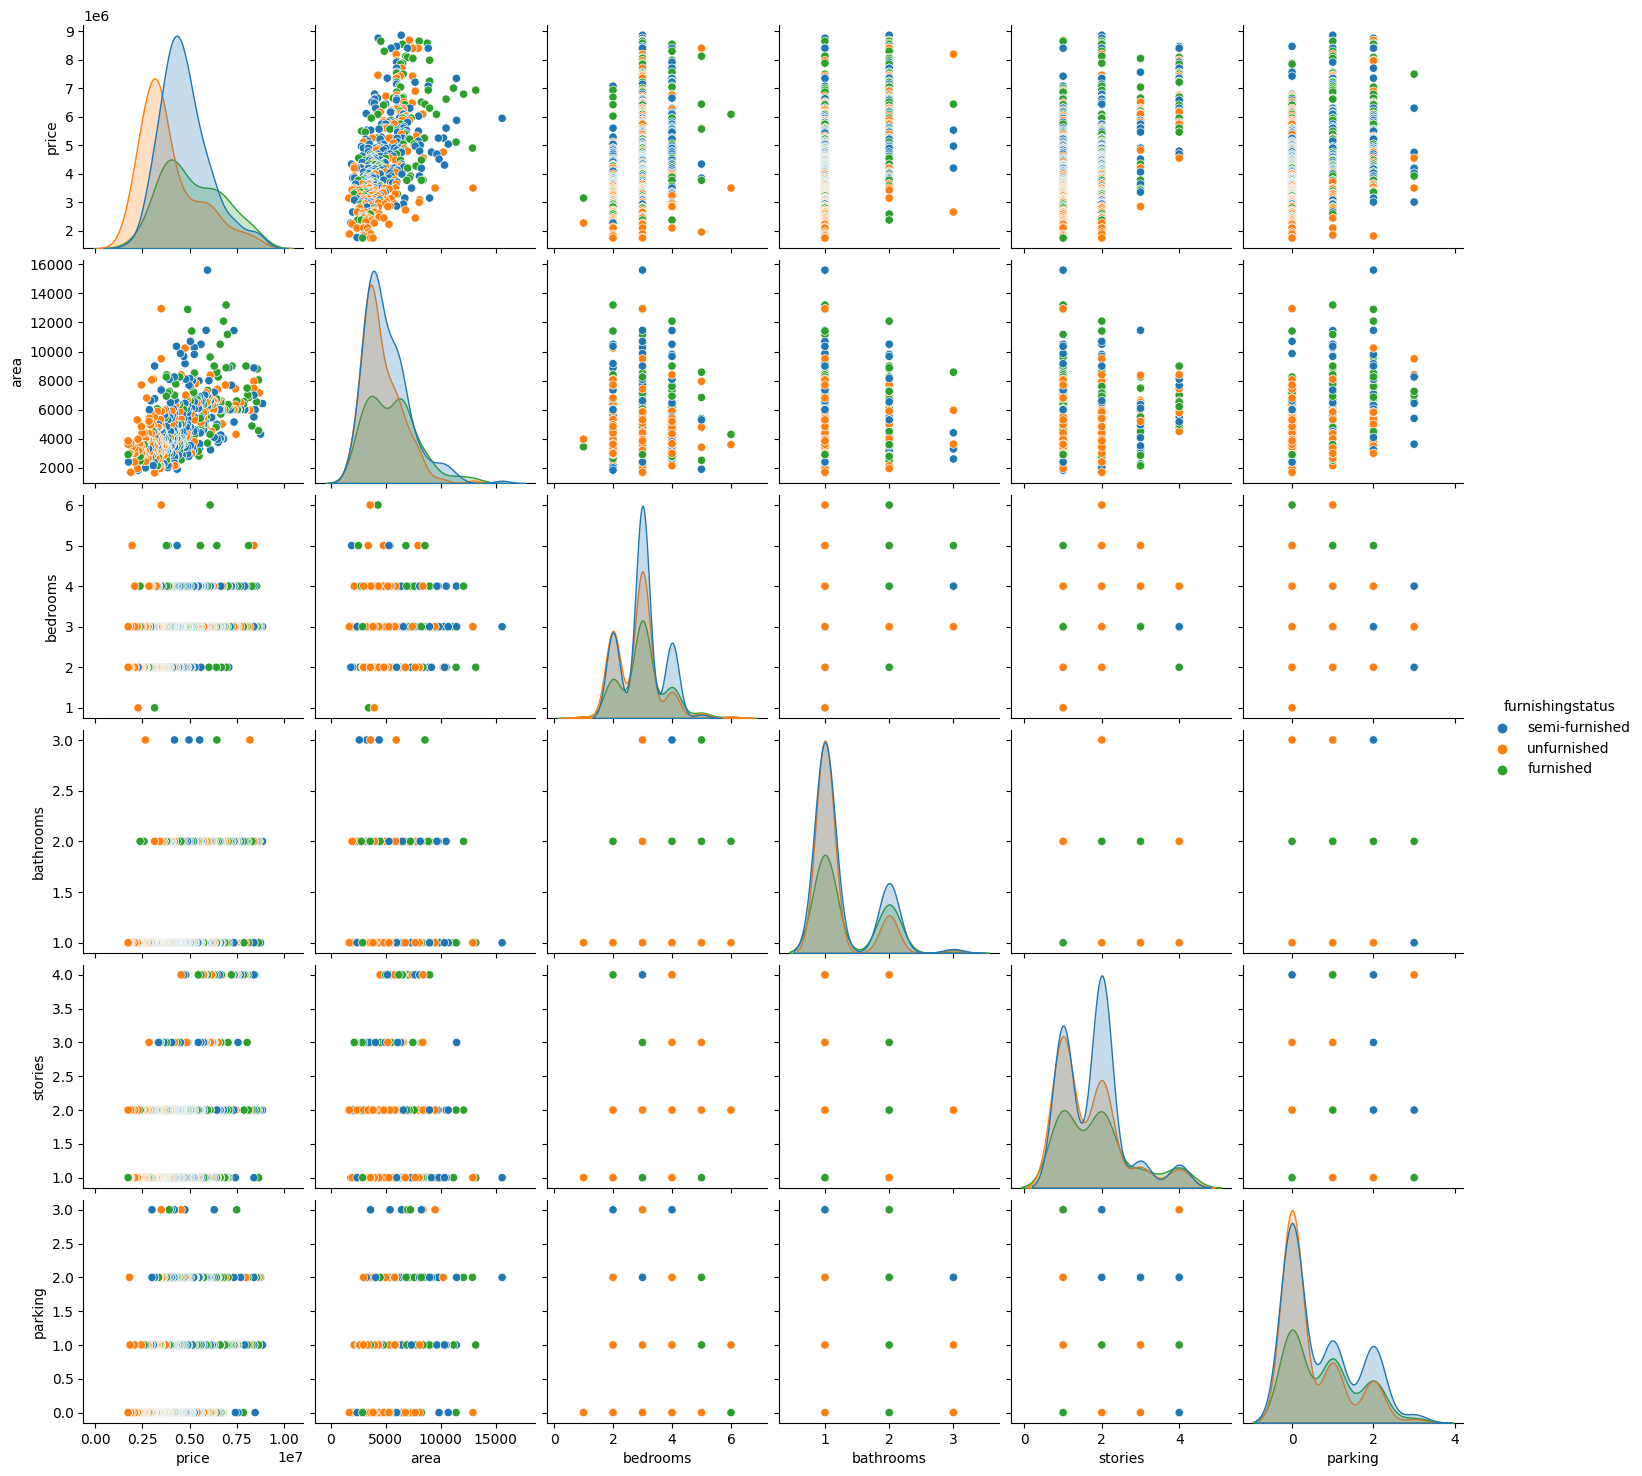

In [39]:
sns.pairplot(df,hue="furnishingstatus")

# Feature Engineering 🛠️


In [40]:
status = pd.get_dummies(data[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True)
data = pd.concat([data, status], axis = 1)
data.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)
data.head()


,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,9100000,6000,4,1,2,2,True,False,True,False,True,False,False,False
1,9100000,6600,4,2,2,1,False,True,True,True,True,False,True,True
2,8960000,8500,3,2,4,2,False,False,True,False,False,False,True,False
3,8890000,4600,3,2,2,2,False,False,True,True,False,False,True,False
4,8855000,6420,3,2,2,1,True,False,True,False,False,False,True,True


In [46]:
X = data.drop(['price'],axis=1)
y = data['price']

In [47]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X)
X_poly

array([[1.00e+00, 6.00e+03, 4.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 6.60e+03, 4.00e+00, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [1.00e+00, 8.50e+03, 3.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [1.00e+00, 3.62e+03, 2.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.91e+03, 3.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 3.85e+03, 3.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [48]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Feature Scaling ⚖️

In [49]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models Training with Hyper-Parameter Tuning and Analysis 📈


In [85]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    },
    'KNN Regressor': {
        'model': KNeighborsRegressor(),
        'params': {'n_neighbors': list(range(5, 31, 5))}
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'Support Vector Regressor': {
        'model': SVR(),
        'params': {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf']}
    },
    'Decision Tree Regressor': {
        'model': DecisionTreeRegressor(),
        'params': {'max_depth': list(range(1, 20))}
    },
    'Random Forest Regressor': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [50, 100, 150, 200, 300], 'max_depth': list(range(1, 20))}
    },
}

Performing hyperparameter tuning for Logistic Regression...
Best hyperparameters for Logistic Regression: {'C': 100}
Best R2 Score after tuning: 0.16074484325882077

Results for Logistic Regression on the test set:
Mean Square Error : 2097546082531.4465
R2 Score : 0.3430076238070705


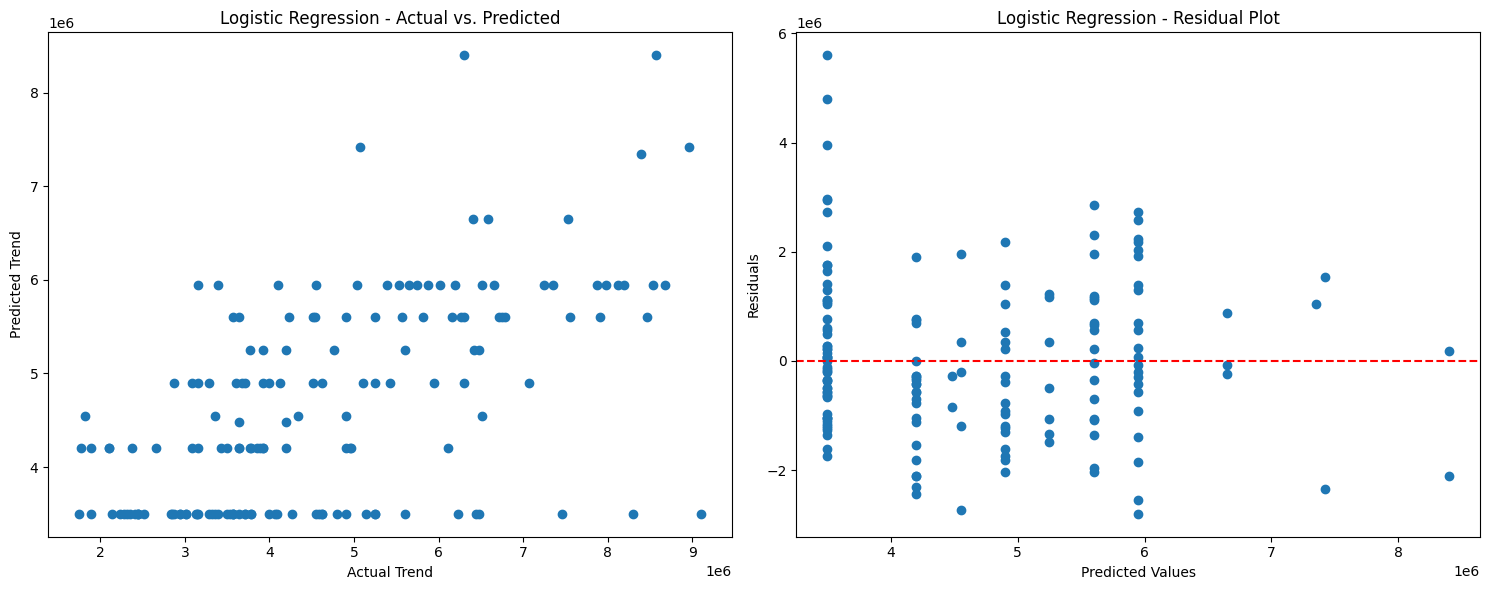



Performing hyperparameter tuning for KNN Regressor...
Best hyperparameters for KNN Regressor: {'n_neighbors': 30}
Best R2 Score after tuning: 0.3121858126789987

Results for KNN Regressor on the test set:
Mean Square Error : 2096018303076.053
R2 Score : 0.3434861541540587


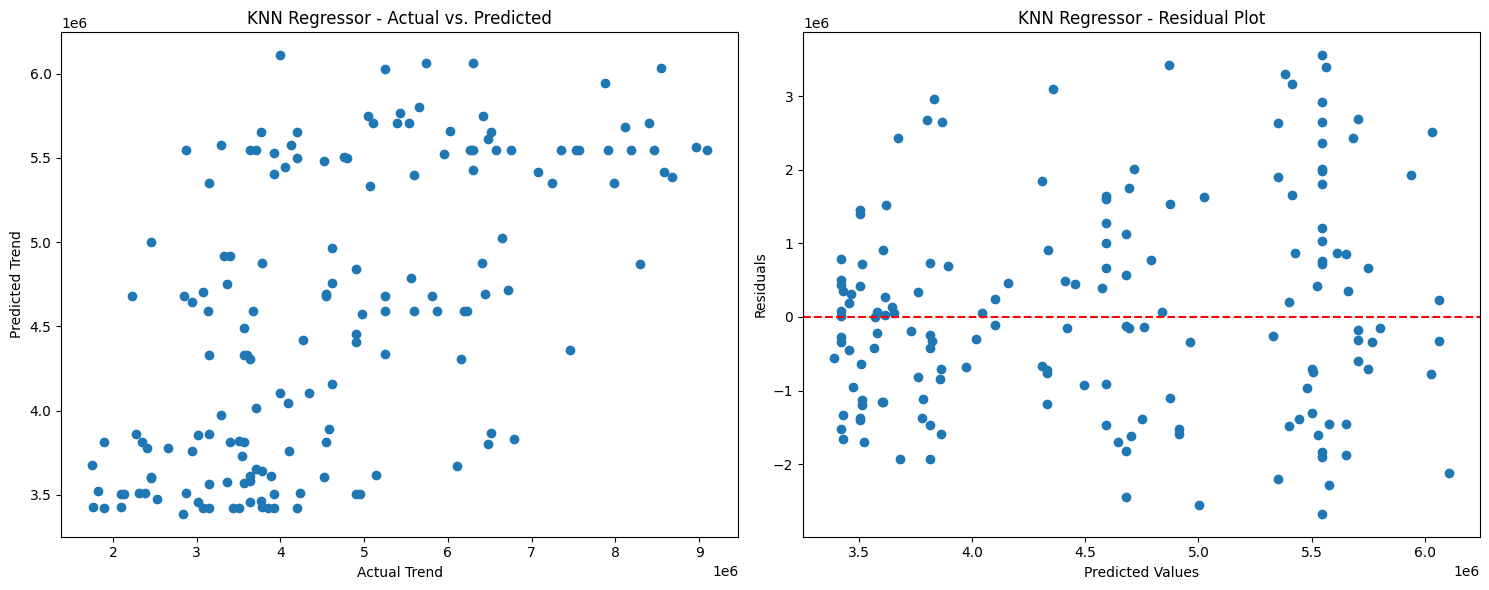



Performing hyperparameter tuning for Naive Bayes...
Best hyperparameters for Naive Bayes: {}
Best R2 Score after tuning: 0.3446722031860493

Results for Naive Bayes on the test set:
Mean Square Error : 2106055286933.9622
R2 Score : 0.3403423748924086


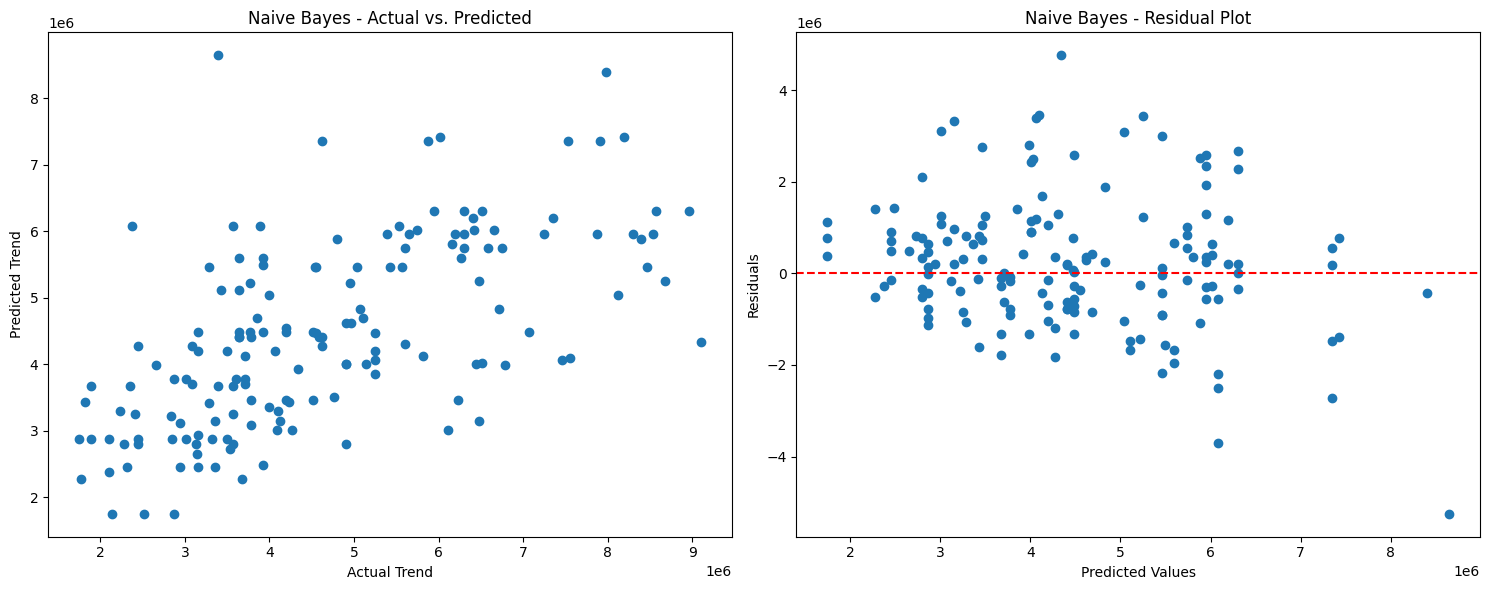



Performing hyperparameter tuning for Support Vector Regressor...
Best hyperparameters for Support Vector Regressor: {'C': 1000, 'kernel': 'linear'}
Best R2 Score after tuning: 0.3045133124311839

Results for Support Vector Regressor on the test set:
Mean Square Error : 2074559052126.056
R2 Score : 0.3502076104264016


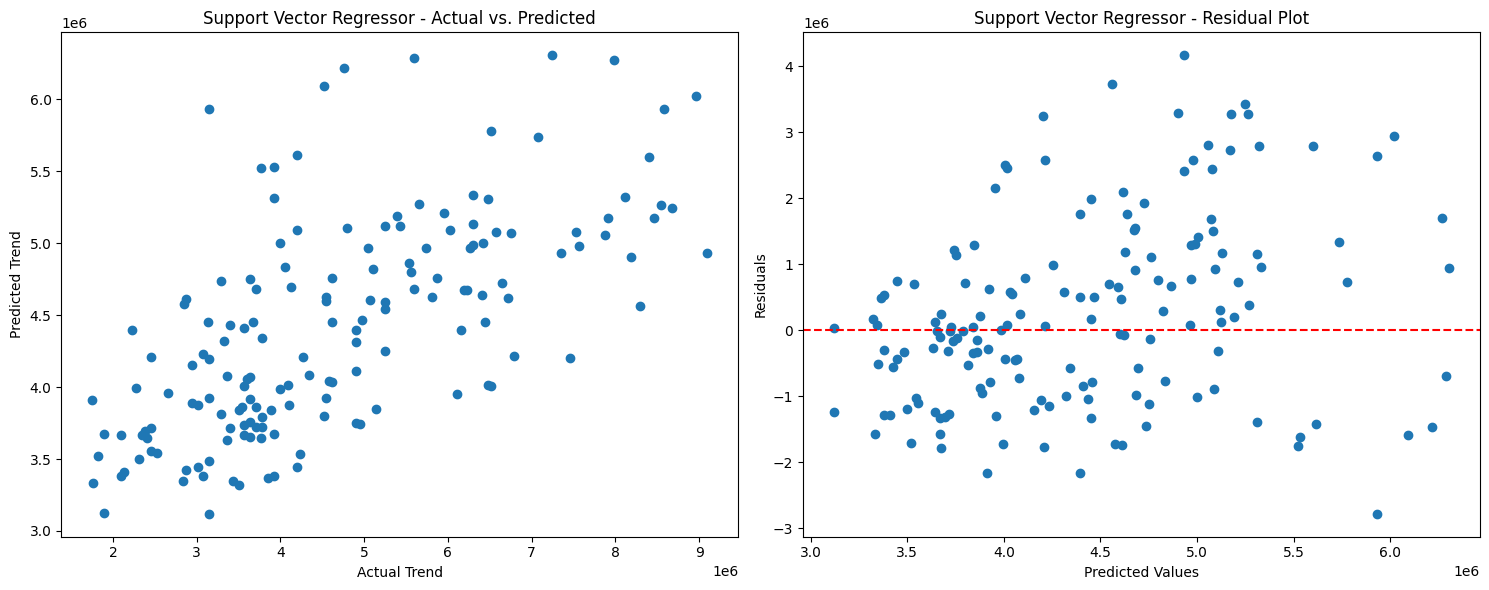



Performing hyperparameter tuning for Decision Tree Regressor...
Best hyperparameters for Decision Tree Regressor: {'max_depth': 4}
Best R2 Score after tuning: 0.4994945564313428

Results for Decision Tree Regressor on the test set:
Mean Square Error : 1499470949464.2888
R2 Score : 0.5303364296378733


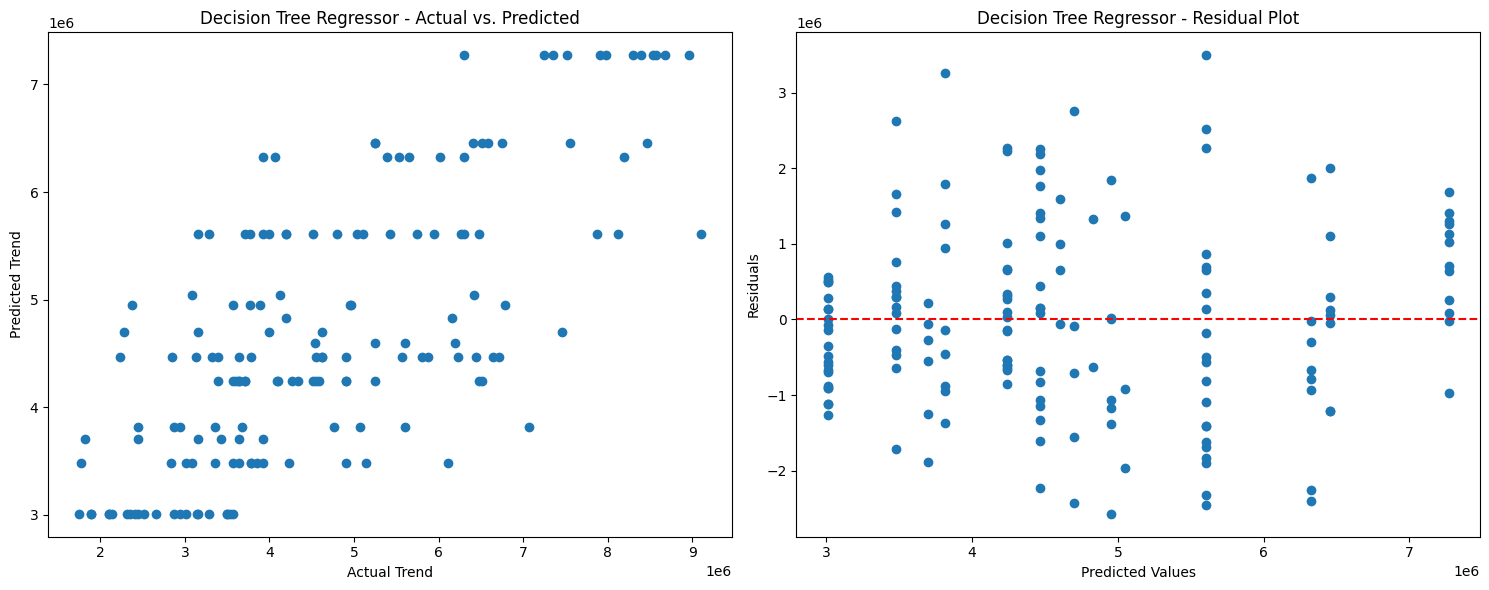



Performing hyperparameter tuning for Random Forest Regressor...
Best hyperparameters for Random Forest Regressor: {'max_depth': 9, 'n_estimators': 300}
Best R2 Score after tuning: 0.6269853876742632

Results for Random Forest Regressor on the test set:
Mean Square Error : 1143905425697.7688
R2 Score : 0.6417064921586081


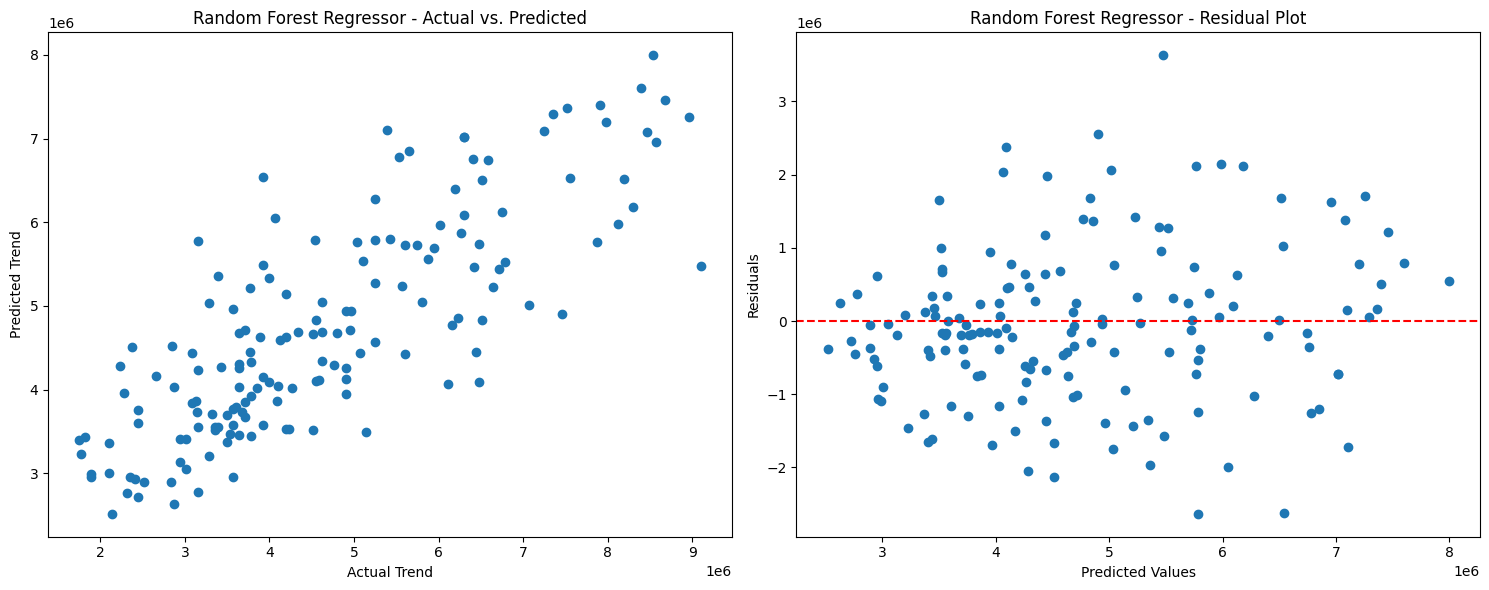

In [95]:
for model_name, model_info in models.items():
    print(f"Performing hyperparameter tuning for {model_name}...")
    
    # Create GridSearchCV object for the current model
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='r2')
    
    # Fit the model on the training data with hyperparameter tuning
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    #best hyperparameters
    print(f"Best hyperparameters for {model_name}: {best_params}")
    print(f"Best R2 Score after tuning: {grid_search.best_score_}")
    
    # Evaluate the model on the test set
    y_pred = best_model.predict(X_test)
    
    # Calculate Mean Squared Error and R2 Score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print results
    print(f"\nResults for {model_name} on the test set:")
    print(f"Mean Square Error : {mse}")
    print(f"R2 Score : {r2}")
    
    # Plots
    plt.figure(figsize=(15, 6))

    # Plot Actual vs. Predicted values
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Trend')
    plt.ylabel('Predicted Trend')
    plt.title(f'{model_name} - Actual vs. Predicted')


    residuals = y_test - y_pred

    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{model_name} - Residual Plot')

    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*50 + "\n")

# Models Evaluation 🧪

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: #F0E68C; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

Results for Logistic Regression:
- Mean Square Error: 2097546082531.4465
- R2 Score: 0.3430 (indicating a moderate performance after hyperparameter tuning)

Results for KNN Regressor:
- Mean Square Error: 2096018303076.053
- R2 Score: 0.3435 (indicating a moderate performance after hyperparameter tuning)

Results for Naive Bayes:
- Mean Square Error: 2106055286933.9622
- R2 Score: 0.3403 (indicating a moderate performance after hyperparameter tuning)

Results for Support Vector Regressor:
- Mean Square Error: 2074559052126.056
- R2 Score: 0.3502 (indicating a moderate performance after hyperparameter tuning)

Results for Decision Tree Regressor:
- Mean Square Error: 1499470949464.2888
- R2 Score: 0.5303 (indicating a moderate to good performance after hyperparameter tuning)

Results for Random Forest Regressor:
- Mean Square Error: 1143905425697.7688
- R2 Score: 0.6417 (indicating a good performance after hyperparameter tuning)

📈 Overall Analysis:
- Logistic Regression shows moderate performance with an accuracy of 0.3430 after hyperparameter tuning.
- KNN Regressor performs moderately well with an accuracy of 0.3435 after hyperparameter tuning.
- Naive Bayes maintains a decent accuracy with a score of 0.3403 after hyperparameter tuning.
- Support Vector Regressor exhibits a moderate accuracy of 0.3502 after hyperparameter tuning.
- Decision Tree Regressor performs well with an accuracy of 0.5303 after hyperparameter tuning.
- Random Forest Regressor achieves the highest accuracy among the models at 0.6417, indicating strong predictive performance after hyperparameter tuning.

</div>


# Model Evaluation with Insights 

## Identifying the best model based on R2 score

In [99]:
best_model_name = max(best_models, key=lambda k: r2_score(y_test, best_models[k].predict(X_test)))
best_model = best_models[best_model_name]
print(f"Best Model: {best_model_name}")
print(f"Best Model R2 Score: {r2_score(y_test, best_model.predict(X_test))}")
print(f"Best Model Hyperparameters: {best_model.get_params()}")

Best Model: Random Forest Regressor
Best Model R2 Score: 0.6326849408414965
Best Model Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 17, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## Train the best model on the entire dataset

In [100]:
best_model.fit(X, y)

RandomForestRegressor(max_depth=17, n_estimators=50)

## Evaluate the best model on the test set

In [101]:
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)


## Provide insights

In [106]:

print(f"Best Model - Name: {best_model_name}")
print(f"Best Model - Mean Squared Error: {mse_best}")
print(f"Best Model - R2 Score: {r2_best}")

Best Model - Name: Random Forest Regressor
Best Model - Mean Squared Error: 175328081265.90543
Best Model - R2 Score: 0.9450838226232355


# Accuracy 🎯

In [112]:
# Create a dictionary to store R2 scores for each model
r2_scores = {}


for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores[model_name] = r2

data = pd.DataFrame.from_dict(r2_scores, orient='index', columns=['R2 Score'])
data.index.name = 'Model'


print(data)


                          R2 Score
Model                             
Logistic Regression       0.343008
KNN Regressor             0.343486
Naive Bayes               0.340342
Support Vector Regressor  0.350208
Decision Tree Regressor   0.530336
Random Forest Regressor   0.945084


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: #F0E68C; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Logistic Regression achieved an R2 Score of 0.343008, indicating poor performance.
* KNN Regressor performed moderately well with an R2 Score of 0.343486.
* Naive Bayes showed decent performance with an R2 Score of 0.340342.
* Support Vector Regressor had a slightly higher R2 Score of 0.350208, indicating poor performance on the given regression problem.
* Decision Tree Regressor performed well with an R2 Score of 0.530336.
* Random Forest Regressor achieved the highest R2 Score among the models at 0.945084, indicating strong predictive performance.

</div>
